<a href="https://colab.research.google.com/github/sbseong/Algorithm/blob/master/%5B%EC%86%94%EB%A1%9C%EC%9C%84%ED%81%AC_%EC%B6%94%EA%B0%80%EC%9E%90%EB%A3%8C%5D_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / Solo / VAE*

---


# WarmUp
- [AE(autoencoder)에서 VAE까지 설명영상](https://youtu.be/9zKuYvjFFS8)

# Variational AutoEncoder (VAE)

Keras에 해당 자료가 있어서, 쉽게 작성되었습니다. 
하지만, 각각을 공부하시면서 베이지안 개념을 한번 더 생각해보시면서 읽으시면 도움이 될 것 같습니다. 





코딩은 간단하지만, 개념 및 원리를 이해하기 위해서 설명해야 할 자료가 많습니다. 
1. AE에 대한 이해 필요.
- AE에서는 `Input x`와 `latent z`에 대해서 알아야 합니다. 
- 기본적으로 정보의 압축을 필요로 하는 z의 경우가 x보다 작은 차원입니다.
- 한편으로 x를 z로 만들었다가 다시 $\hat x$를 만드는 과정을 학습하기 위한 과정
- 직관적으로 접근하자만, 손실은 어쩔 수 없이 발생하지만, 원상복구를 할 때 최대한 비슷하게 하는 과정에서 핵심 특성들만을 반영하는 z를 찾는 과정이라고 할 수 있습니다. 

2. VAE로 확장
- 분포에서 샘플링을 하는 개념을 이해해야 합니다. 
  * 간단한 예로 동전을 던진다고 하면 1/2 확률로 앞면이 나오는 것을 무수히 수행하는 것입니다. 
  * 주사위는 1/6확률이 되겠죠. 그렇지만 이런 확률을 단순히 확률 값이 아닌 분포로서 $N(1/6, 1)$을 따르는 확률로 바라보아야 한다는 것입니다. 
- z라는 샘플링은 어떤 분포(prior 분포)에서 추출되게 됩니다. 
- 추출된 z를 이용해서 x를 만들어내는 Decoder과정을 AE에서 배웠습니다. 
- $p(z)$를 통해서 $p(x|z)$를 만들어야 하는데, 이 부분이 어려우니 신경망을 이용하겠다는 것입니다.

3. 샘플링을 하는 것은 연속성이 없어서 학습을 시킬 수 있나?
4. 어떤 기준으로 학습을 해야 하나? 라는 질문에 답한 내면서 풀어놓은 것이 해당 논문이 되겠습니다. 

## MLE의 변형
x에 대한 MLE의 정의에 의하면,

> $\widehat {\ell \,}$
$(\theta \,;x)={\frac {1}{n}}\sum _{i=1}^{n}\ln f(x_{i}\mid \theta )$

다음과 같을 때, 우리가 원하는 식은

log를 취하지 않은 형태의 form으로 보면, <br>
> $\int p_\theta(z) p_\theta(x|z) dz$

이 수식을 통해서 추적할 수가 없다는 점이다. 
수식을 변형을 시켜보면, 

> $log p_\theta(x^i) = E_{z \sim q_\phi(z|x)}[log p_\theta(x^i)]$

> $= E_z[$
$ log p_\theta(x^i|z) p_\theta(z) \over p_\theta(z|x^i) $
$ ]$  (Bayes's rule을 변형하여 적용)

> $= E_z[$
$ log p_\theta(x^i|z) p_\theta(z) q_\phi(z|x^i) \over p_\theta(z|x^i) q_\phi(z|x^i) $
$ ]$ (같은 수로 나누고 곱합)

> $= E_z[log p_\theta(x^i|z)]$ $- E_z [log$
$ q_\phi(z|x^i) \over p_\theta(z)$
$ ] + $
$ E_z [log $
$ q_\phi(z|x^i) \over p_\theta(z|x^i)$
$ ]$ 
<br> (로그의 특성을 이용하여 변형, 덧셈은 항을 분리할 수 있고, -는 역수)

> $= E_z[log p_\theta(x^i|z)]$ $ - D_{KL}(q_\phi (z|x^i) || p_\theta (z) )$
$ + D_{KL}(q_\phi (z|x^i) || p_\theta (z|x^i) )$ 

<br> ($ D_{KL}(q_\phi (z|x^i) || p_\theta (z|x^i) )  >= 0 $ 이기 때문에 계산할 수 없는 항을 빼고 Lower Bound를 설정한다)

> $ E_z[log p_\theta(x^i|z)]$ $ - D_{KL}(q_\phi (z|x^i) || p_\theta (z) )$ 를 최대화하는 것을 우리의 목표로 바꿀 수 있다.

[참조 블로그 1](https://wingnim.tistory.com/70)
<br>[참조 블로그 2](http://jaejunyoo.blogspot.com/2017/05/auto-encoding-variational-bayes-vae-3.html)

목표 수식을 다음과 같이 축약해볼 수 있습니다. 

$(\theta^*,\phi^*)=\arg\max_{\theta,\phi} \cal{L}(\theta,\phi;x^{(i)}).$
<br><br>
학습해야할 수식은 찾았지만, 여전히 샘플링 과정에서의 문제를 해결하려면 추가해야 할 것이 있습니다. 

##The reparameterization trick

"sampling"은 미분이 가능한 연산이 아니기 때문에 이 문제를 해결하기 위한 Trick을 넣는 것입니다.  Gradient descent로 업데이트를 해나간다는 것은 모델이 각 parameter에 대해 미분이 가능하다는 전제로 진행되는 것입니다. fixed parameter들에 대해 stochasticity는 input에만 있고 같은 input에 대해서는 항상 같은 output이 나와야 하는데 이 "sampling"이란 녀석은 모델 자체에 stochasticity를 넣어버리기 때문에 문제가 되는 것입니다. 

> $z\sim q_\phi(z|x)$

이녀석을 변형하여 미분가능한 식으로 만들어야 합니다. 

> $\tilde{z}=g_\phi (\epsilon,x)~~with~~\epsilon\sim p(\epsilon).$

$g_\phi(ϵ,x)$를 사용하여 문제를 해결해야 합니다. <br> 임의의 함수 $f(z)$의 $q_\phi(z|x)$에 대한 Monte Carlo expectation estimate은 다음과 같습니다:

> $\mathbb{E}_{q_\phi(z|x^{(i)})}\left[f(z)\right]$ <br>$=\mathbb{E}_{p(\epsilon)}\left[f(g_\phi (\epsilon,x^{(i)}))\right]$ <br>$=\frac{1}{L}\sum_{l=1}^L f(g_\phi (\epsilon^{(l)},x^{(i)})),~~where~~\epsilon^{(l)}\sim p(\epsilon).$

이 수식을 앞에서 변형한 것처럼 single value estimate을 넣었듯이 원 식에 정리하면,

> $\tilde{\cal{L}}(\theta,\phi;x^{(i)})$<br>$=-D_{KL}(q_\phi(z|x^{(i)})||p_\theta(z))+\frac{1}{L}\sum_{l=1}^L (\log p_\theta(x^{(i)}|z^{(i,l)})), \\where~~z^{(i,l)}=g_\phi (\epsilon^{(i,l)},x^{(i)})~~and~~\epsilon^{(l)}\sim p(\epsilon).$

z가 사라지고, ϵ에 대한 수식으로 구성된 것을 보실 수 있습니다. 

<img src="https://1.bp.blogspot.com/-V-m6dOVaUL8/WQ2JKJ4Jj4I/AAAAAAAABrA/BjxqKMDfR6ggYCCqUNlBFiS4cqlyisgKACK4B/s1600/vae_3.PNG"/>

다음과 같은 형태로 학습을 할 수 있도록 변형된 것입니다. 

요약하면, 
1. 분포로부터 샘플링되는 z를 알아내기 위해서 
2. 그 z를 통해서 생성되는 x를 잘 나타내기위해서 MLE를 변형하여 사용한다. 
3. 역전파를 위해서 z를 ϵ에 대한 수식으로 변환하는 trick를 통해 학습할 수 있도록 변형한다.























# 코드로 들어가 봅시다.

In [1]:
# 항상 잊지말고 추가해줍시다.
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## Create a sampling layer


In [2]:
# 
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


## Build the encoder


In [3]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 7, 7, 64)     18496       conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 3136)         0           conv2d_1[0][0]                   
____________________________________________________________________________________________

## Build the decoder


In [4]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

## Define the VAE as a `Model` with a custom `train_step`


In [5]:

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = encoder(data)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= 28 * 28
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }



## Train the VAE


In [6]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)


11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/30
547/547 [==============================] - 99s 182ms/step - loss: 207.2535 - reconstruction_loss: 205.1521 - kl_loss: 2.1014
Epoch 2/30
547/547 [==============================] - 100s 182ms/step - loss: 170.9014 - reconstruction_loss: 168.1017 - kl_loss: 2.7997
Epoch 3/30
547/547 [==============================] - 100s 182ms/step - loss: 160.7630 - reconstruction_loss: 157.6992 - kl_loss: 3.0638
Epoch 4/30
547/547 [==============================] - 99s 182ms/step - loss: 156.9225 - reconstruction_loss: 153.7129 - kl_loss: 3.2096
Epoch 5/30
547/547 [==============================] - 99s 181ms/step - loss: 154.7560 - reconstruction_loss: 151.4589 - kl_loss: 3.2971
Epoch 6/30
547/547 [==============================] - 99s 181ms/step - loss: 153.3434 - reconstruction_loss: 149.9816 - kl_loss: 3.3618
Epoch 7/30
547/547 [==============================] - 99s 181ms/step - loss: 152.0951 - reconstruction_loss: 148.6892

## Display a grid of sampled digits


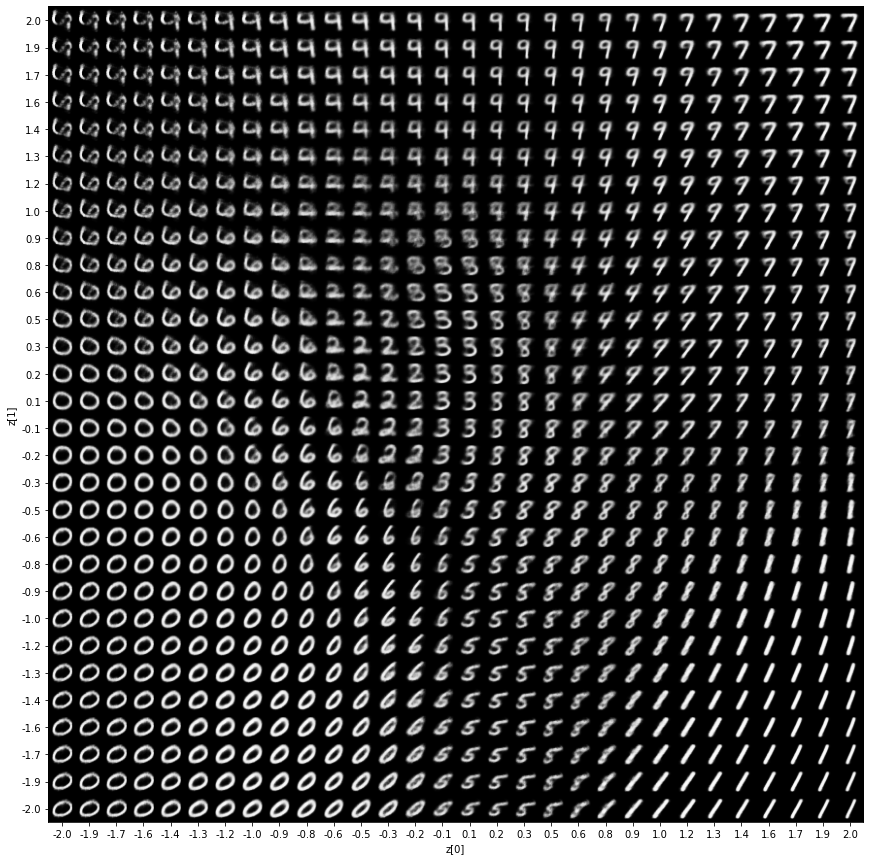

In [7]:
import matplotlib.pyplot as plt


def plot_latent(encoder, decoder):
    # display a n*n 2D manifold of digits
    n = 30
    digit_size = 28
    scale = 2.0
    figsize = 15
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent(encoder, decoder)


## Display how the latent space clusters different digit classes


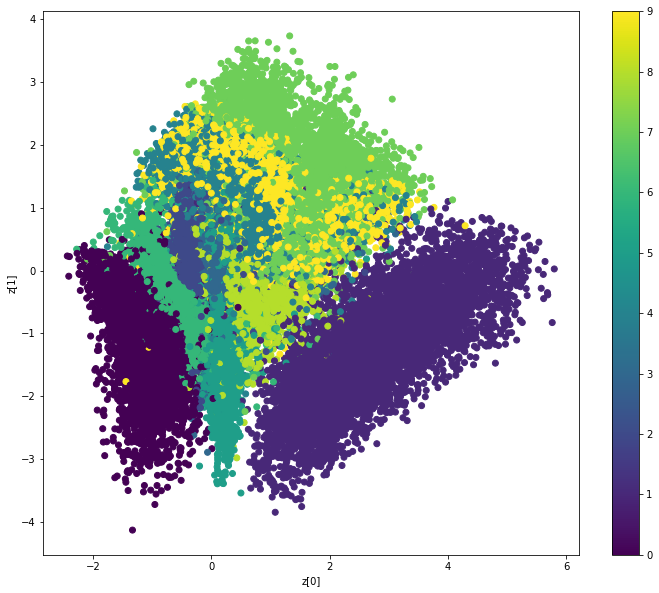

In [8]:

def plot_label_clusters(encoder, decoder, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(encoder, decoder, x_train, y_train)
